# Data preparation and EDA

In [30]:
#Import of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Data import and preparation

In [31]:
# Step 1: Read csv and select relevant columns directly
essential_columns = ['loan_amnt', 'int_rate', 'loan_status', 'grade', 'purpose', 'annual_inc', 
                     'dti', 'installment', 'emp_length', 'home_ownership', 'verification_status']

df_essential= pd.read_csv("../raw/Loan_status_2007-2020Q3-100ksample.csv", usecols=essential_columns)

# Step 2: Convert percentage strings to numeric for 'int_rate'
df_essential['int_rate'] = df_essential['int_rate'].str.replace('%', '').astype(float)

# Step 3: Impute missing values for numeric columns
numeric_cols = df_essential.select_dtypes(include=[np.number]).columns
df_essential[numeric_cols] = df_essential[numeric_cols].fillna(df_essential[numeric_cols].mean())

# Step 4: Impute missing values for categorical columns with mode
categorical_cols = df_essential.select_dtypes(include=['object']).columns
df_essential[categorical_cols] = df_essential[categorical_cols].fillna(df_essential[categorical_cols].mode().iloc[0])

# Step 5: Display first few rows of the cleaned limited dataset
df_essential.head()


,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti
0,4000.0,13.08,134.93,B,10+ years,MORTGAGE,48000.0,Source Verified,Current,home_improvement,20.25
1,24000.0,9.16,500.07,B,6 years,RENT,57000.0,Source Verified,Current,credit_card,25.33
2,5000.0,10.49,162.49,B,10+ years,MORTGAGE,55000.0,Not Verified,Fully Paid,credit_card,7.22
3,24000.0,11.05,522.42,B,10+ years,MORTGAGE,43500.0,Not Verified,Current,debt_consolidation,24.55
4,14000.0,13.59,322.79,C,10+ years,MORTGAGE,48000.0,Source Verified,Fully Paid,debt_consolidation,24.30


### Exploratory data analysis

Numeric Summary:
           loan_amnt       int_rate    installment    annual_inc  \
count  100000.000000  100000.000000  100000.000000  1.000000e+05   
mean    15332.373000      13.056737     451.708510  8.002918e+04   
std      9468.189883       4.876960     273.022605  8.722434e+04   
min       700.000000       5.310000      22.510000  0.000000e+00   
25%      8000.000000       9.170000     253.060000  4.716050e+04   
50%     13000.000000      12.490000     380.810000  6.600000e+04   
75%     20000.000000      16.010000     602.300000  9.500000e+04   
max     40000.000000      30.990000    1719.830000  1.099920e+07   

                 dti  
count  100000.000000  
mean       19.332252  
std        17.269231  
min        -1.000000  
25%        12.067500  
50%        18.110000  
75%        24.870000  
max       999.000000  

Categorical Summary:
         grade emp_length home_ownership verification_status loan_status  \
count   100000     100000         100000              100000     

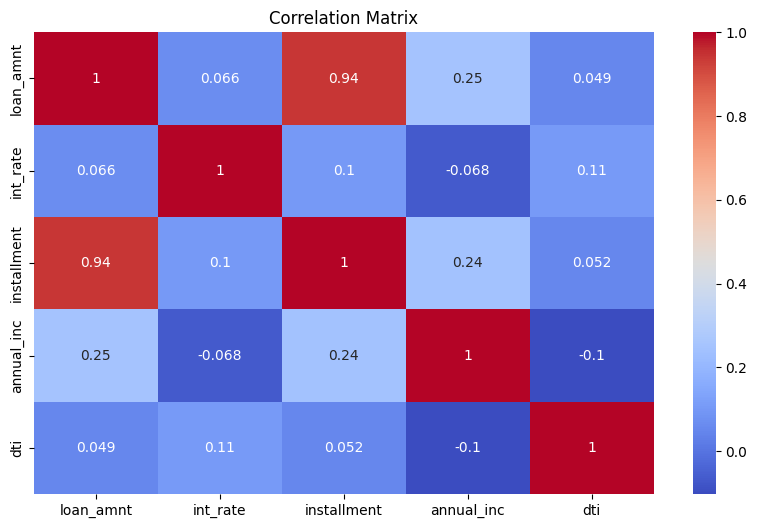

In [32]:
# Step 6: Summary Statistics

# Summary statistics for numeric columns
numeric_summary = df_essential.describe()

# Frequency distribution for categorical columns
categorical_summary = df_essential.describe(include='object')

# Display summaries
print("Numeric Summary:")
print(numeric_summary)

print("\nCategorical Summary:")
print(categorical_summary)

# Step 7: Correlation Matrix for numeric variables
# Select only numeric columns for the correlation matrix
numeric_df = df_essential.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


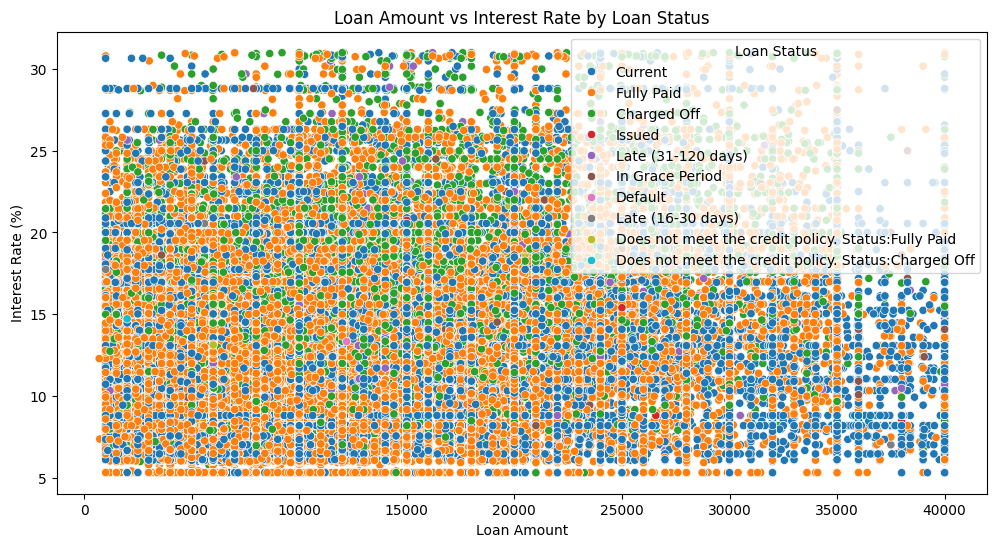

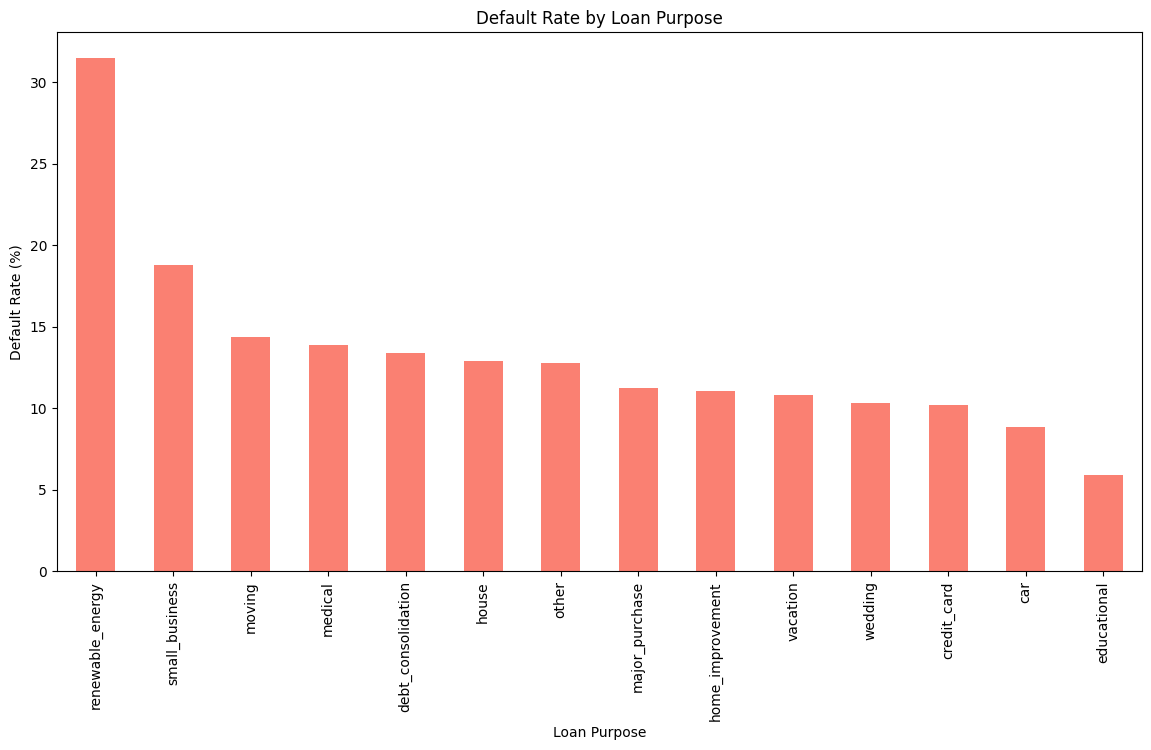

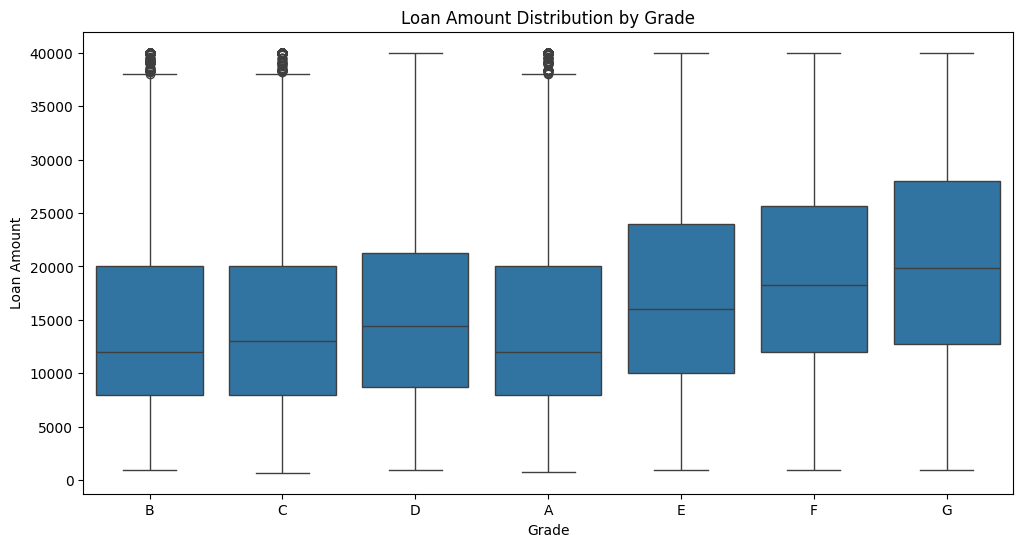

In [33]:
#Step 8 visualization
# Visualization 1: Loan Amount vs Interest Rate by Loan Status
plt.figure(figsize=(12, 6))
sns.scatterplot(x='loan_amnt', y='int_rate', hue='loan_status', data=df_essential)
plt.title('Loan Amount vs Interest Rate by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate (%)')
plt.legend(title='Loan Status')
plt.show()

# Visualization 2: Default Rate by Loan Purpose
plt.figure(figsize=(14, 7))
loan_purpose_default = df_essential[df_essential['loan_status'] == 'Charged Off']['purpose'].value_counts()
loan_purpose_total = df_essential['purpose'].value_counts()
default_rate = (loan_purpose_default / loan_purpose_total) * 100

default_rate.sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title('Default Rate by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Default Rate (%)')
plt.show()

# Visualization 3: Income vs Loan Amount by Grade
plt.figure(figsize=(12, 6))
sns.boxplot(x='grade', y='loan_amnt', data=df_essential)
plt.title('Loan Amount Distribution by Grade')
plt.xlabel('Grade')
plt.ylabel('Loan Amount')
plt.show()

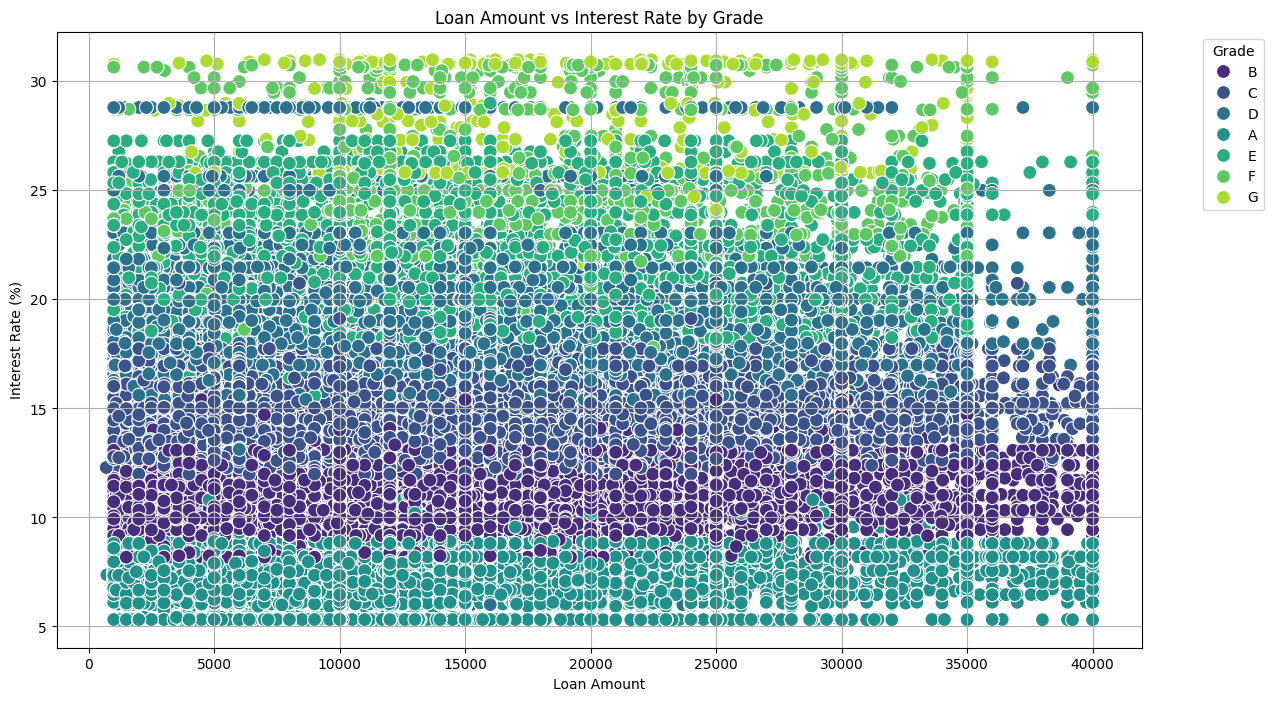

In [34]:
#Enhanced Visualization: Loan Amount vs Interest Rate by Grade
plt.figure(figsize=(14, 8))
sns.scatterplot(x='loan_amnt', y='int_rate', hue='grade', data=df_essential, palette='viridis', s=100)
plt.title('Loan Amount vs Interest Rate by Grade')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate (%)')
plt.legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### Categorical Feature Encoding

In [35]:
# Ordinal encoding for 'grade'
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
df_essential['grade'] = df_essential['grade'].astype(pd.api.types.CategoricalDtype(categories=grade_order, ordered=True)).cat.codes

# Clean and encode 'emp_length'
emp_mapping = {
    '< 1 year': 0.5,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}
df_essential['emp_length'] = df_essential['emp_length'].map(emp_mapping)

In [36]:
df_essential[['grade', 'emp_length']].head() # Check one-hot columns

,grade,emp_length
0,1,10.0
1,1,6.0
2,1,10.0
3,1,10.0
4,2,10.0


### Saving the cleaned data

In [37]:
# Save the cleaned dataframe as CSV to an existing folder
df_essential.to_csv("../processed/cleaned_loan_data.csv", index=False)

# Conclusions and insights

1. Default Rate by Loan Purpose:

Observation:
Renewable Energy and Small Business loans have the highest default rates.

Car and Educational loans have the lowest default rates.
Actionable Insight:
Offer more competitive rates for low-risk purposes to attract safer borrowers.

2. Loan Amount vs. Interest Rate by Loan Status:

Borrowers with better grades (A and B):
Qualify for larger loan amounts due to their lower risk of default. 
Receive lower interest rates as lenders compete to attract these low-risk borrowers.

Borrowers with lower grades (C and below):
Are approved for smaller loan amounts to minimize potential losses.
Pay higher interest rates to compensate lenders for the higher risk of default.

Insight: Implement stricter loan amount caps and higher interest rates for lower grades (C and below) to mitigate risk exposure.